### Danger Level Forecasting Preliminary Models

Testing out some of the classification models

#### Import Tools

In [5]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler

#### Import Data

In [6]:
avi = pd.read_csv('SnowWeatherClean1.csv')
avi.head()

,Unnamed: 0,avi_danger,avg_wind,temp_max_swing,temp_max_swing_from_avg,year,month,day,temp_max,temp_min,...,prevailing_wind_N_2,prevailing_wind_NE_2,prevailing_wind_NW_2,prevailing_wind_S_2,prevailing_wind_SE_2,prevailing_wind_SW_2,prevailing_wind_W_2,three_day_snow_2,five_day_snow_2,next_day_avi_danger
0,2,1.0,20.58,0.0,0.0,2010.0,12.0,20.0,15,5,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.2,0.2,3.0
1,3,3.0,35.12,3.0,0.0,2010.0,12.0,21.0,18,10,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.3,0.3,2.0
2,4,2.0,33.78,-3.0,0.0,2010.0,12.0,22.0,15,7,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.5,2.5,3.0
3,5,3.0,31.32,0.0,0.0,2010.0,12.0,23.0,15,6,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4.3,4.5,2.0
4,6,2.0,32.44,2.0,1.4,2010.0,12.0,24.0,17,9,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,8.3,8.6,2.0


#### filter data

In [7]:
avi = avi.drop(['Unnamed: 0'], axis=1)

In [8]:
avi = avi[avi['avi_danger'].notnull()]
avi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1251 entries, 0 to 1250
Data columns (total 73 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   avi_danger                 1251 non-null   float64
 1   avg_wind                   1251 non-null   float64
 2   temp_max_swing             1251 non-null   float64
 3   temp_max_swing_from_avg    1251 non-null   float64
 4   year                       1251 non-null   float64
 5   month                      1251 non-null   float64
 6   day                        1251 non-null   float64
 7   temp_max                   1251 non-null   int64  
 8   temp_min                   1251 non-null   int64  
 9   water_equivalent           1251 non-null   float64
 10  snow_fall                  1251 non-null   float64
 11  snow_depth_6am             1251 non-null   float64
 12  wind_speed_sum             1251 non-null   int64  
 13  sunshine_percent           1251 non-null   int64

#### Fill Remaing NA's

In [37]:
avi = avi.fillna(0)
avi = avi[avi.avi_danger != 5]
avi = avi[avi.next_day_avi_danger != 5]
avi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1249 entries, 0 to 1252
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avi_danger               1249 non-null   float64
 1   avg_wind                 1249 non-null   float64
 2   temp_max_swing           1249 non-null   float64
 3   temp_max_swing_from_avg  1249 non-null   float64
 4   year                     1249 non-null   float64
 5   month                    1249 non-null   float64
 6   day                      1249 non-null   float64
 7   temp_max                 1249 non-null   int64  
 8   temp_min                 1249 non-null   int64  
 9   water_equivalent         1249 non-null   float64
 10  snow_fall                1249 non-null   float64
 11  snow_depth_6am           1249 non-null   float64
 12  wind_speed_sum           1249 non-null   int64  
 13  sunshine_percent         1249 non-null   int64  
 14  west_wind_hours         

#### Splitting Dataset

In [9]:
x = avi.iloc[:, 0:avi.shape[1]-2]
y = avi.iloc[:, avi.shape[1]-1]

print(x.shape)
print(y.shape)


(1251, 71)
(1251,)


#### Standardizing

In [10]:
#standardizer 
def standardize(X_train, X_test):
    scaler = StandardScaler()
    # Fitting and transforming training data
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    # Tranforming testing data based on traning fit (prevent data leakage)
    X_test = scaler.transform(X_test)
    return X_train, X_test

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

# Scaling
x_train, x_test = standardize(x_train, x_test)

In [12]:
print(y)

(unique, counts) = np.unique(y, return_counts=True)
frequencies = np.asarray((unique, counts)).T

print(frequencies)


0       3.0
1       2.0
2       3.0
3       2.0
4       2.0
       ... 
1246    3.0
1247    3.0
1248    3.0
1249    2.0
1250    1.0
Name: next_day_avi_danger, Length: 1251, dtype: float64
[[  1. 369.]
 [  2. 473.]
 [  3. 339.]
 [  4.  68.]
 [  5.   2.]]


### Descision Trees 

In [13]:
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              }


ds = DecisionTreeClassifier()
ds_cv = RandomizedSearchCV(estimator=ds, param_distributions=random_grid, n_iter=100, scoring='f1_weighted')
ds_cv.fit(x_train, y_train)
y_pred_ds = ds_cv.predict(x_test)
print(accuracy_score(y_test, y_pred_ds))
print(cross_val_score(ds, x_train, y_train, cv=3))

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


0.536741214057508
[0.49201278 0.53674121 0.52564103]


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(("The least populated class in y has only %d"


In [14]:
print(confusion_matrix(y_test, y_pred_ds))

[[61 19 11  1  0]
 [15 69 24  0  0]
 [11 37 36  6  0]
 [ 1  9 10  2  0]
 [ 1  0  0  0  0]]


In [15]:

print(classification_report(y_test, y_pred_ds))

              precision    recall  f1-score   support

         1.0       0.69      0.66      0.67        92
         2.0       0.51      0.64      0.57       108
         3.0       0.44      0.40      0.42        90
         4.0       0.22      0.09      0.13        22
         5.0       0.00      0.00      0.00         1

    accuracy                           0.54       313
   macro avg       0.37      0.36      0.36       313
weighted avg       0.52      0.54      0.53       313



/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Random Forest

In [24]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}


rf = RandomForestClassifier(class_weight = "balanced")
rf.fit(x_train, y_train)
rf_cv = RandomizedSearchCV(estimator=rf, param_distributions=random_grid, n_iter=5, scoring='f1_weighted')
rf_cv.fit(x_train, y_train)
y_pred_rf = rf_cv.predict(x_test)
print(accuracy_score(y_test, y_pred_rf))
print(cross_val_score(rf, x_train, y_train, cv=3))

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


0.5878594249201278


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(("The least populated class in y has only %d"


[0.63578275 0.63258786 0.62179487]


In [25]:
print(confusion_matrix(y_test, y_pred_rf))

[[70 16  5  1  0]
 [19 70 19  0  0]
 [13 34 43  0  0]
 [ 2 10  9  1  0]
 [ 1  0  0  0  0]]


In [26]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

         1.0       0.67      0.76      0.71        92
         2.0       0.54      0.65      0.59       108
         3.0       0.57      0.48      0.52        90
         4.0       0.50      0.05      0.08        22
         5.0       0.00      0.00      0.00         1

    accuracy                           0.59       313
   macro avg       0.45      0.39      0.38       313
weighted avg       0.58      0.59      0.57       313



/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0.5, 0, 'Random Forest Feature Importance')

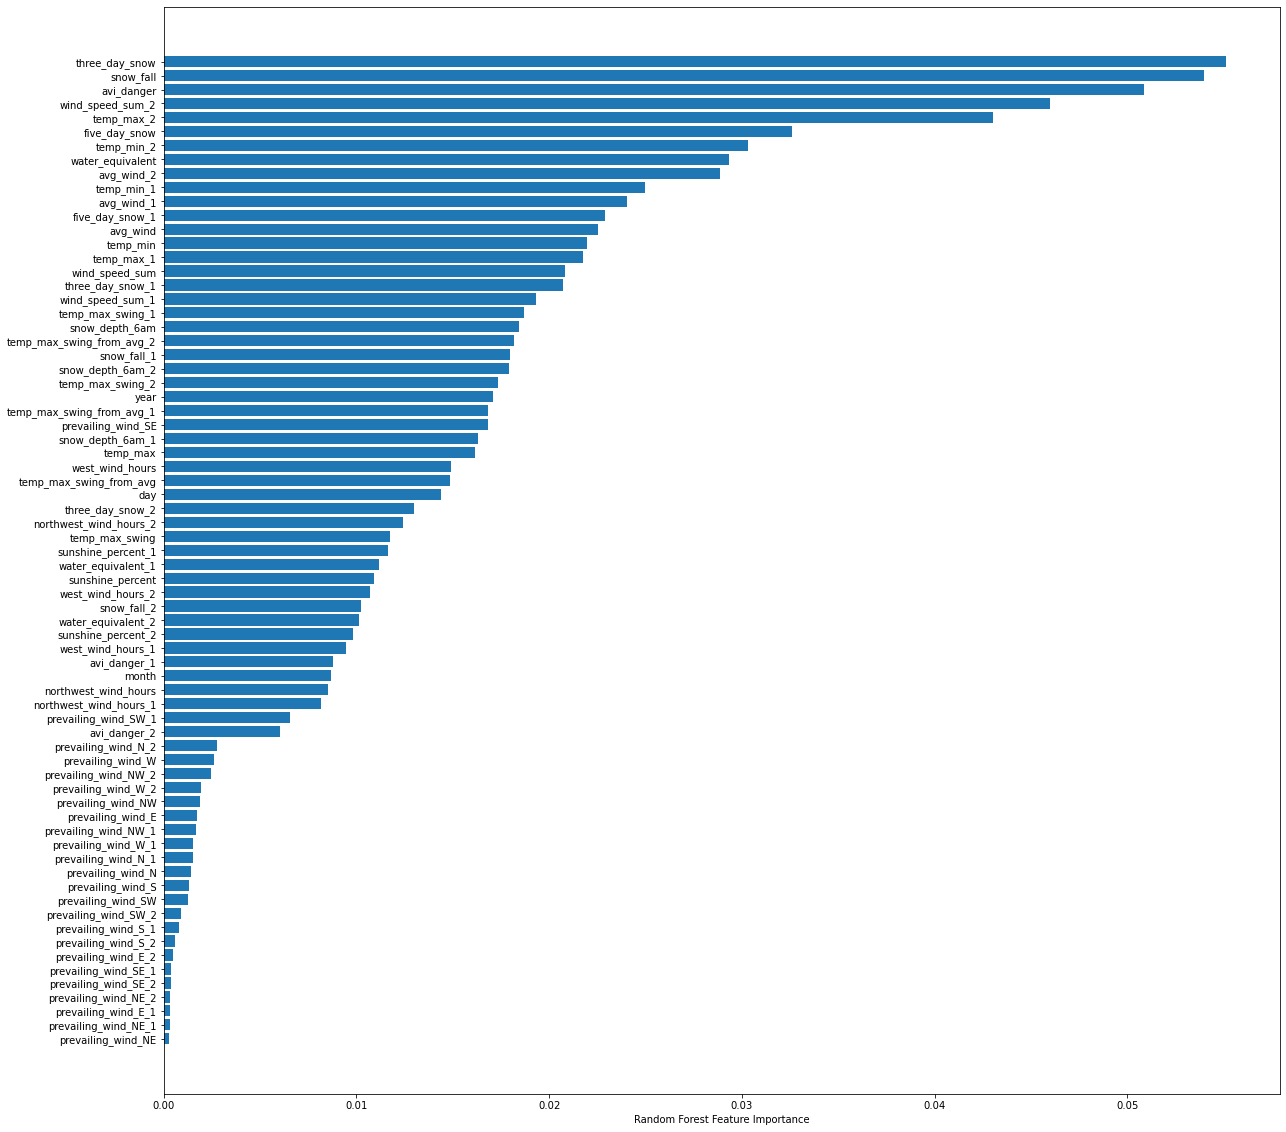

In [32]:
sorted_idx = rf.feature_importances_.argsort()
plt.figure(figsize=[20,20])
plt.barh(avi.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

### Extra Forest

In [19]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

et = ExtraTreesClassifier(class_weight = "balanced")
et_cv = RandomizedSearchCV(estimator=et, param_distributions=random_grid, n_iter=5, scoring='f1_weighted')
et_cv.fit(x_train, y_train)
y_pred_et = et_cv.predict(x_test)
print(accuracy_score(y_test, y_pred_et))
print(cross_val_score(rf, x_train, y_train, cv=3))

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


0.597444089456869


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(("The least populated class in y has only %d"


[0.64217252 0.64217252 0.64102564]


In [20]:
print(confusion_matrix(y_test, y_pred_et))

[[71 15  6  0  0]
 [19 68 21  0  0]
 [13 29 48  0  0]
 [ 3  8 11  0  0]
 [ 1  0  0  0  0]]


In [21]:
print(classification_report(y_test, y_pred_et))

              precision    recall  f1-score   support

         1.0       0.66      0.77      0.71        92
         2.0       0.57      0.63      0.60       108
         3.0       0.56      0.53      0.55        90
         4.0       0.00      0.00      0.00        22
         5.0       0.00      0.00      0.00         1

    accuracy                           0.60       313
   macro avg       0.36      0.39      0.37       313
weighted avg       0.55      0.60      0.57       313



/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
